In [1]:
from google.oauth2.credentials import Credentials
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carica le credenziali dal file JSON
#data = 'credentials.json'
#creds = Credentials.from_authorized_user_info(data)

In [2]:
# connect to google 

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360) 

In [3]:
# build payload

kw_list = ["bitcoin"] # list of keywords to get data 

pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m')

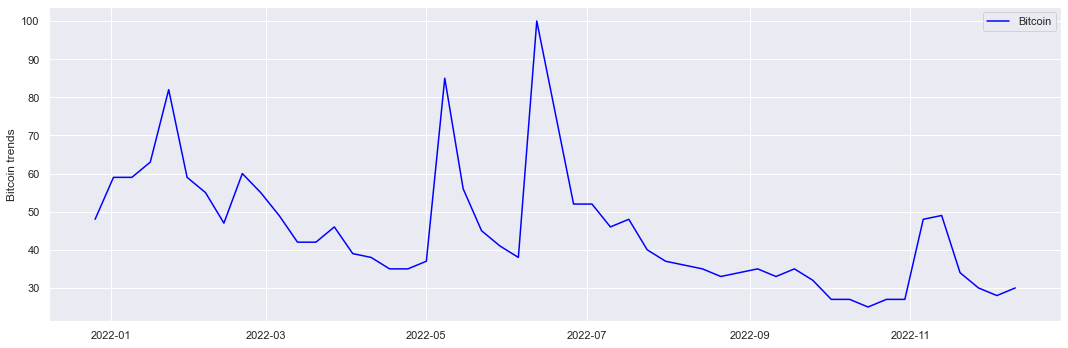

In [4]:
#1 Interest over Time
data = pytrends.interest_over_time() 

#fig = plt(data, x="date", y=['bitcoin'], title='Keyword Web Search Interest Over Time')
#fig.show() 

sns.set()
plt.figure(figsize=(15,5))

plt.plot(data['bitcoin'],
         label='Bitcoin',
         color='blue')

plt.ylabel('Bitcoin trends')
plt.legend();
plt.tight_layout();

In [5]:
data.head()

,bitcoin,isPartial
date,,
2021-12-26,48,False
2022-01-02,59,False
2022-01-09,59,False
2022-01-16,63,False
2022-01-23,82,False


In [6]:
#riempio le date vuote con l'ultimo dato registrato
df = data.resample('D').ffill()
df.head(10)

,bitcoin,isPartial
date,,
2021-12-26,48,False
2021-12-27,48,False
2021-12-28,48,False
2021-12-29,48,False
2021-12-30,48,False
2021-12-31,48,False
2022-01-01,48,False
2022-01-02,59,False
2022-01-03,59,False


In [7]:
df = df.reset_index()
df.head()

,date,bitcoin,isPartial
0,2021-12-26,48,False
1,2021-12-27,48,False
2,2021-12-28,48,False
3,2021-12-29,48,False
4,2021-12-30,48,False


In [8]:
df = df.rename(columns=({'date': 'time', 'bitcoin': 'trend'}))

In [9]:
df = df.set_index('time')
df.head()

,trend,isPartial
time,,
2021-12-26,48,False
2021-12-27,48,False
2021-12-28,48,False
2021-12-29,48,False
2021-12-30,48,False


In [10]:
df2 = pd.read_csv('data/bitcoin.csv')
print(df2.shape)
df2.head()

(204, 7)


,time,low,high,open,close,volume,greed_and_fear
0,2022-12-21,16725.78,16926.05,16896.17,16811.38,12065.325735,26
1,2022-12-20,16398.22,17060.86,16439.98,16897.65,34330.282352,29
2,2022-12-19,16273.40,16822.84,16742.33,16439.74,26856.085987,29
3,2022-12-18,16663.76,16875.00,16782.23,16741.16,11073.438862,26
4,2022-12-17,16585.64,16799.99,16634.29,16782.25,18446.683602,28


In [11]:
df2 = df2.reset_index()
df2['time'] = df2['time'] = pd.to_datetime(df2['time'])
df2 = df2.set_index('time')


In [12]:
# Unisci i due dataframe in base alla colonna 'data'
df_merged = pd.merge(df2, df, on='time')

# Stampa il dataframe unificato
df_merged.head()

,index,low,high,open,close,volume,greed_and_fear,trend,isPartial
time,,,,,,,,,
2022-12-11,10,17073.19,17271.92,17128.10,17085.21,9948.852670,26,30,False
2022-12-10,11,17093.42,17227.64,17130.49,17128.10,7860.586876,27,28,False
2022-12-09,12,17060.69,17352.62,17226.03,17130.59,20976.636999,26,28,False
2022-12-08,13,16738.00,17300.59,16839.76,17226.01,23533.234537,25,28,False
2022-12-07,14,16679.52,17140.22,17089.18,16840.00,22635.468488,29,28,False


In [13]:
df = df_merged.drop(columns=['index', 'isPartial'])
print(df.shape)
df.head()

(194, 7)


,low,high,open,close,volume,greed_and_fear,trend
time,,,,,,,
2022-12-11,17073.19,17271.92,17128.10,17085.21,9948.852670,26,30
2022-12-10,17093.42,17227.64,17130.49,17128.10,7860.586876,27,28
2022-12-09,17060.69,17352.62,17226.03,17130.59,20976.636999,26,28
2022-12-08,16738.00,17300.59,16839.76,17226.01,23533.234537,25,28
2022-12-07,16679.52,17140.22,17089.18,16840.00,22635.468488,29,28


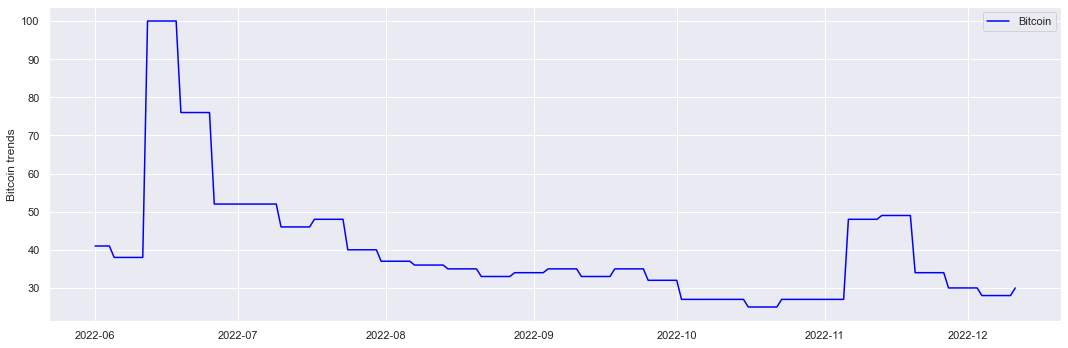

In [14]:
sns.set()
plt.figure(figsize=(15,5))

plt.plot(df['trend'],
         label='Bitcoin',
         color='blue')

plt.ylabel('Bitcoin trends')
plt.legend();
plt.tight_layout();

**save dataset**

In [16]:
df.to_csv('data/bitcoin.csv')